In [9]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

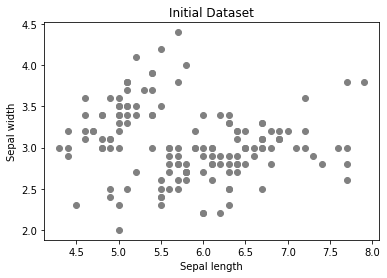

In [10]:
iris_dataset = load_iris()
data = iris_dataset.data
data = iris_dataset.data[:, :2] 

plt.scatter(data[:, 0], data[:, 1], c='gray')
plt.title("Initial Dataset")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [13]:
data

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [11]:
class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k                   # Số cụm
        self.max_iters = max_iters   # Số vòng lặp tối đa
        self.centroids = None        # Tọa độ tâm cụm
        self.clusters = None         # Cụm của từng điểm dữ liệu

    def initialize_centroids(self, data):
        """
        Khởi tạo ngẫu nhiên tâm cụm
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
        Return:
            None
        """
        np.random.seed(42)
        self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

    def euclidean_distance(self, x1, x2):
        """
        Tính khoảng cách Euclid giữa hai điểm dữ liệu
        Parameters:
            x1 (numpy.ndarray): điểm dữ liệu 1
            x2 (numpy.ndarray): điểm dữ liệu 2
        Return:
            float: khoảng cách Euclid
        """
        return np.sqrt(np.sum(np.power(x1 - x2, 2)))

    def assign_clusters(self, data):
        """
        Phân cụm dữ liệu
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
        Return:
            numpy.ndarray: mảng chứa cluster của từng điểm dữ liệu
        """

        # Tính toán khoảng cách giữa mỗi điểm dữ liệu (data point) và tâm (centroids) bằng cách sử dụng hàm euclidean_distance
        distances = np.array([[self.euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])

        # print(np.argmin(distances, axis=1)) # Có thể in ra dòng này để thấy cách biểu diễn mảng chứa allocation
        return np.argmin(distances, axis=1)

    def update_centroids(self, data):
        """
        Cập nhật tâm cụm
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
        Return:
            numpy.ndarray: mảng chứa tâm cụm mới
        """
        return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k)])

    def fit(self, data):
        """
        Hàm huấn luyện
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
        Return:
            None
        """
        # Gọi tới phương thức khởi tạo ngẫu nhiên tâm cụm
        self.initialize_centroids(data)
        self.plot_clusters(data, 0)

        for i in range(self.max_iters):
            # Gán cụm cho các data point gần nhất
            self.clusters = self.assign_clusters(data)

            # Visualize các cụm và tâm cụm tại iteration này
            self.plot_clusters(data, i)

            # Dựa vào các data point của từng cụm, dịch chuyển tâm cụm tới vị trí trung tâm (tính mean) của cụm
            new_centroids = self.update_centroids(data)

            # Nếu tâm cụm không di chuyển, dừng lại
            if np.all(self.centroids == new_centroids):
                break

            # Nếu tâm cụm có di chuyển, thực hiện lại vòng lặp với các giá trị tâm cụm mới
            self.centroids = new_centroids
            self.plot_clusters(data, i)

        # Plot kết quả cuối cùng của các cụm, tâm cụm
        self.plot_final_clusters(data)


    def plot_clusters(self, data, iteration):
        """
        Vẽ các cụm và tâm cụm tại mỗi iteration
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
            iteration (int): iteration hiện tại
        Return:
            None
        """
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title(f"Iteration {iteration + 1}")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

    def plot_final_clusters(self, data):
        """
        Vẽ các cụm và tâm cụm cuối cùng
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
        Return:
            None
        """
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title("Final Clusters and Centroids")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

In [17]:
import numpy as np

data = np.array([
    [2.0, 3.0, 1.5],
    [3.0, 3.5, 2.0],
    [3.5, 3.0, 2.5],
    [8.0, 8.0, 7.5],
    [8.5, 8.5, 8.0],
    [9.0, 8.0, 8.5],
    [1.0, 2.0, 1.0],
    [1.5, 2.5, 1.5]
])

# Khởi tạo centroids ngẫu nhiên
np.random.seed(0)
centroids = data[np.random.choice(data.shape[0], 3, replace=False)]

# K-means clustering
def kmeans(data, centroids, k=3, max_iters=100):
    for _ in range(max_iters):
        # Phân cụm
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        clusters = np.argmin(distances, axis=0)
        
        # Cập nhật centroids
        new_centroids = np.array([data[clusters == j].mean(axis=0) for j in range(k)])
        
        # Kiểm tra sự thay đổi của centroids
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids

# Áp dụng K-means
centroids = kmeans(data, centroids)

# In kết quả
print("Centroids:", centroids)


Centroids: [[1.25       2.25       1.25      ]
 [8.5        8.16666667 8.        ]
 [2.83333333 3.16666667 2.        ]]


In [18]:
import numpy as np
from sklearn.cluster import KMeans

# Tạo dữ liệu ban đầu
data = np.array([
    [2.0, 3.0, 1.5],
    [3.0, 3.5, 2.0],
    [3.5, 3.0, 2.5],
    [8.0, 8.0, 7.5],
    [8.5, 8.5, 8.0],
    [9.0, 8.0, 8.5],
    [1.0, 2.0, 1.0],
    [1.5, 2.5, 1.5]
])

# Khởi tạo và huấn luyện KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data)

# Lấy centroids
centroids = kmeans.cluster_centers_

# In kết quả
print("Centroids:", centroids)


Centroids: [[8.5        8.16666667 8.        ]
 [1.25       2.25       1.25      ]
 [2.83333333 3.16666667 2.        ]]


c:\Users\LENOVO\anaconda\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\LENOVO\anaconda\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\LENOVO\anaconda\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\LENOVO\anaconda\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\LENOVO\anaconda\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
c:\Users\LENOVO\anaconda\lib\site-packages\skl